In [7]:
import pandas as pd

pd.options.display.max_rows = 10
pd.options.display.max_columns = 1000


In [5]:
df = pd.read_csv("/data/insurance.csv")

In [12]:
X = df[["age","gender","bmi","children","smoker","region"]]
X

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [14]:
y = df["charges"]

In [15]:
# One Hot encoding
pd.get_dummies(X, drop_first=True)

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [16]:
X = pd.get_dummies(X, drop_first=True)

In [18]:
from sklearn import model_selection

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values
                                    , test_size = 0.3, random_state = 1)

In [22]:
type(X), type(X.values)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [33]:
X_train.shape, X_test.shape

((936, 8), (402, 8))

In [34]:
936 / (936 + 402)

0.6995515695067265

In [23]:
X.values

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [24]:
X_train

array([[50.  , 26.41,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [21.  , 26.4 ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [25.  , 26.22,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [51.  , 34.96,  2.  , ...,  0.  ,  0.  ,  0.  ],
       [40.  , 22.22,  2.  , ...,  0.  ,  1.  ,  0.  ],
       [57.  , 27.94,  1.  , ...,  0.  ,  1.  ,  0.  ]])

Feature transformation. The rule should be consistent for training and test data. 

Z = (x - avg(x)) / std(x) for every feature or column x. Z will have 0 mean and 1 standard deviation

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(X_train) # Calculates the mean and std for each column

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
X_train_std = scaler.transform(X_train) # returns the Z-score values for each column

In [30]:
X_test_std = scaler.transform(X_test)

In [32]:
pd.DataFrame(X_train_std)

,0,1,2,3,4,5,6,7
0,0.797152,-0.702114,-0.904002,0.976766,-0.509664,1.788102,-0.600387,-0.587220
1,-1.271085,-0.703758,-0.085679,-1.023787,-0.509664,-0.559252,-0.600387,1.702939
2,-0.985811,-0.733340,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220
3,0.797152,-0.414510,1.550967,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
4,0.868471,1.482037,-0.085679,0.976766,-0.509664,-0.559252,-0.600387,1.702939
...,...,...,...,...,...,...,...,...
931,1.510338,-0.292894,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,1.702939
932,-0.914493,-0.218117,0.732644,-1.023787,-0.509664,-0.559252,-0.600387,-0.587220
933,0.868471,0.703039,0.732644,-1.023787,1.962076,-0.559252,-0.600387,-0.587220
934,0.083967,-1.390722,0.732644,-1.023787,1.962076,-0.559252,1.665591,-0.587220


In [35]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-9.014631e-17,3.054122e-15,-1.869795e-16,-1.119712e-16,1.775645e-16,1.560955e-16,1.518254e-17,2.436323e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00


In [36]:
from sklearn import linear_model

In [37]:
est = linear_model.LinearRegression()

In [39]:
est.fit(X_train_std, y_train) # find the theta values

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
est.coef_

array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
       9733.78688309, -129.54588605, -414.54148288, -379.09534369])

In [41]:
est.intercept_

13276.698553898497

In [42]:
pd.DataFrame({"feature": X.columns, "theta": est.coef_})

,feature,theta
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [44]:
from sklearn import pipeline, preprocessing

In [45]:
target = "charges"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = df[target]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values
                                    , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [49]:
est = pipe.steps[-1][-1]

In [50]:
est.coef_

array([3528.98273114, 1961.65520818,  421.55016415, -141.35911014,
       9733.78688309, -129.54588605, -414.54148288, -379.09534369])

In [51]:
y_train_pred = pipe.predict(X_train)

In [52]:
y_test_pred = pipe.predict(X_test)

In [55]:
result = pd.DataFrame({"true": y_test, "predicted": y_test_pred})
result["error"] = result["true"] - result["predicted"]

In [56]:
result

,predicted,true,error
0,4610.315541,1646.42970,-2963.885841
1,12887.893880,11353.22760,-1534.666280
2,12573.948752,8798.59300,-3775.355752
3,13197.836626,10381.47870,-2816.357926
4,629.337182,2103.08000,1473.742818
...,...,...,...
397,16224.053528,11566.30055,-4657.752978
398,3861.767583,1880.48700,-1981.280583
399,3274.369325,2457.21115,-817.158175
400,27065.591340,17043.34140,-10022.249940


In [58]:
import numpy as np

In [61]:
mse = np.mean(result.error ** 2) # Lower is better
mse

36761456.35201327

In [62]:
y_test_var = np.var(y_test)

In [63]:
mse/y_test_var

0.259401068307279

In [65]:
mse / np.mean((y_test - y_train.mean()) ** 2)

0.2594002695488973

In [67]:
r2 = 1 - mse / y_test_var
r2

0.7405989316927211

In [68]:
import pickle

In [69]:
with open("/tmp/insurance.pickle", "wb") as f:
    pickle.dump(pipe, f)

In [70]:
with open("/tmp/insurance.pickle", "rb") as f:
    pipe = pickle.load(f)

In [73]:
from sklearn import metrics

In [74]:
metrics.mean_squared_error(y_test, pipe.predict(X_test))

36761456.35201328

In [77]:
target = "charges"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = df[target]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values
                                    , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)

print("r2 Train:", r2_train,
      "\nr2 test: ", r2_test,
      "\nmse train: ", mse_train,
      "\nmse test: ", mse_test
     )


r2 Train: 0.7545557492633161 
r2 test:  0.740598931692721 
mse train:  36476790.76410686 
mse test:  36761456.35201328


In [79]:
target = "charges"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values
                                    , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
mse_train = metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred))
mse_test = metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred))

print("r2 Train:", r2_train,
      "\nr2 test: ", r2_test,
      "\nmse train: ", mse_train,
      "\nmse test: ", mse_test
     )


r2 Train: 0.7589104330619343 
r2 test:  0.78742951961976 
mse train:  67564665.80947612 
mse test:  69185448.09379752


In [80]:
69185448/36761456

1.8820105493101253

In [88]:
target = "charges"
#X = df.drop(columns=[target])
X = df.copy()
del X[target]
# bucketizing the continuous vars
def bmi_group(v):
    if v > 30:
        return "high"
    elif v > 22:
        return "normal"
    else:
        return "low"

def age_group(age):
    if age > 60:
        return "senior"
    elif age < 30: 
        return "young"
    else:
        return "normal"
def smoker_high_bmi(r):
    return (r.smoker == "yes") & (r.bmi > 30)


X["bmi_group"] = X.bmi.apply(bmi_group)
X["age_group"] = X.age.apply(age_group)
X["smoker_high_bmi"] = X.apply(smoker_high_bmi, axis = 1)

X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                                        , y.values
                                    , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
mse_train = metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred))
mse_test = metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred))

print("r2 Train:", r2_train,
      "\nr2 test: ", r2_test,
      "\nmse train: ", mse_train,
      "\nmse test: ", mse_test
     )


r2 Train: 0.780235650529385 
r2 test:  0.8111906480112542 
mse train:  69081223.56092297 
mse test:  68955719.7057414


In [82]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
target = "charges"
#X = df.drop(columns=[target])
X = df.copy()
del X[target]
# bucketizing the continuous vars
def bmi_group(v):
    if v > 30:
        return "high"
    elif v > 22:
        return "normal"
    else:
        return "low"

def age_group(age):
    if age > 60:
        return "senior"
    elif age < 30: 
        return "young"
    else:
        return "normal"
def smoker_high_bmi(r):
    return (r.smoker == "yes") & (r.bmi > 30)


X["bmi_group"] = X.bmi.apply(bmi_group)
X["age_group"] = X.age.apply(age_group)
X["smoker_high_bmi"] = X.apply(smoker_high_bmi, axis = 1)

X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                                        , y.values
                                    , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(max_iter=1000))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
mse_train = metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred))
mse_test = metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred))

print("r2 Train:", r2_train,
      "\nr2 test: ", r2_test,
      "\nmse train: ", mse_train,
      "\nmse test: ", mse_test
     )


r2 Train: 0.7802235733772407 
r2 test:  0.8111871236006977 
mse train:  69054533.98613885 
mse test:  68813337.53454967


# Kaggle house price dataset
https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv

In [95]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
df = df[~df.SalesPrice.isnull()]
del df["Id"]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [100]:
target = "SalesPrice"
#X = df.drop(columns=[target])
X = df.copy()
del X[target]

X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                            , y.values, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)

print("r2 Train:", r2_train,
      "\nr2 test: ", r2_test,
      "\nmse train: ", mse_train,
      "\nmse test: ", mse_test
     )


r2 Train: 0.9494527301808873 
r2 test:  -4.750079859651934e+21 
mse train:  0.007407599211897132 
mse test:  8.977151803375568e+20


In [140]:
target = "SalesPrice"
#X = df.drop(columns=[target])
X = df.copy()
del X[target]

X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                            , y.values, test_size = 0.3, random_state = 1)

weights = []
scores = []
alphas = 10 ** np.linspace(-5, -1, 20)
for alpha in alphas:
    pipe = pipeline.Pipeline([
        ("scaler", preprocessing.StandardScaler()),
        ("est", linear_model.Lasso(alpha=alpha, max_iter=2000))
    ])

    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_test = metrics.r2_score(y_test, y_test_pred)
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    weights.append(pipe.steps[-1][-1].coef_)
    """
    print("alpha", alpha,
          "\nr2 Train:", r2_train,
          "\nr2 test: ", r2_test,
          "\nmse train: ", mse_train,
          "\nmse test: ", mse_test
         )
    """
    scores.append(r2_test)


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


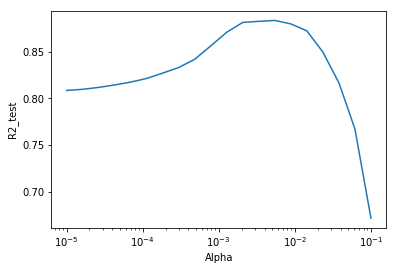

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(alphas, scores)
plt.xlabel("Alpha")
plt.ylabel("R2_test")
plt.xscale("log")

Text(0.5,1,'Effect of regularization param (alpha)\n on magnitude of weights')

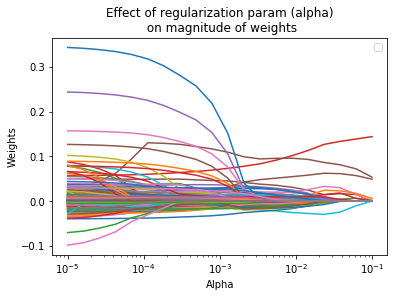

In [145]:
plt.plot(alphas, weights)
plt.legend([])
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Effect of regularization param (alpha)\n on magnitude of weights")

In [113]:
est = pipe.steps[-1][-1]
est.coef_

array([-1.38721715e-03, -1.46704633e-04,  2.36646321e-02,  7.09309794e-02,
        3.60599570e-02,  4.54610592e-02,  1.33382890e-02,  0.00000000e+00,
        1.44749149e-02,  4.99840164e-03, -0.00000000e+00,  5.09939791e-03,
        1.15512453e-02,  0.00000000e+00,  2.07419755e-04,  1.13232346e-01,
        1.40850467e-02,  0.00000000e+00,  1.08404511e-02,  4.18009870e-03,
        4.95698854e-03, -1.40261097e-02,  1.19358821e-02,  8.43140248e-03,
       -0.00000000e+00,  2.66330189e-02,  1.67805154e-02,  1.16293889e-02,
        1.04283787e-02,  1.12742113e-02,  2.08444401e-03,  1.29256445e-02,
        1.62945996e-02,  5.57123389e-04,  1.40456546e-04, -1.05877140e-03,
        5.85297441e-03,  6.02788346e-03,  1.70761645e-02, -0.00000000e+00,
        3.72107374e-04, -4.30284512e-03,  6.26641386e-03,  5.41007041e-03,
       -0.00000000e+00, -8.69002415e-04,  1.00967272e-02, -0.00000000e+00,
        1.93266565e-02,  8.02236098e-03, -0.00000000e+00, -1.30506104e-03,
       -2.93522304e-03,  